##Motivación

Una de mis mayores inquietudes es el fenómeno de la religiosidad, siempre me he preguntado cuál es la relación entre la religiosidad y el status social de un individuo, gracias a la plataforma "Dataverse" dispongo de un archivo csv que almacena una encuesta realizada a una diviersidad de individuos que forman parte del Islam, esto es muy importante porque me permitirá, al menos desde las coordenadas del Islam, responder a esta interrogante.

Adjunto link: https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/NXXGPK

##Análisis en R

De ahora en adelante realizaré un estudio del dataset desde el lenguaje de programación R, el cuál facilitará el estudio de los datos por medio de su visualización a partir de histogramas y gráficos de pastel.

##Implementación de R

In [ ]:
#Importación de R

%load_ext rpy2.ipython

##Importación del dataset

Cabe señalar que el dataset ha pasado por el proceso de data cleaning previo a la importación en R, para ello utilicé el software "OpenRefine", de modo que fueron eliminadas las filas con valores perdidos y aquellas cuyos valores no cumplían el criterio de valores para el tipo de columna.

In [ ]:
%%R

library(readr)

data <- read_csv("Archivo limpio.csv")

Rows: 1594 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Identifier
dbl (14): Female, Age, Gradespassed15, ReadUrdu16, Financialconditionoverlas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


##Gráficas diversas

De ahora en adelante nos interesamos en el estudio de las variables que más se acercan a nuestro tema de interés, con el objetivo de desvelar información útil para comprender el fenómeno de la religiosidad.

In [ ]:
#Fijamos el dataset para graficar con naturalidad

%%R

attach(data)

##Histograma de la frecuencia con la que se recita el Corán

El criterio de respuesta es el siguiente:

* 0 - En ningún momento
* 1 - Diariamente
* 2 - Al menos una vez por semana
* 3 - Al menos una vez por mes
* 4 - Solamente durante el Ramadán

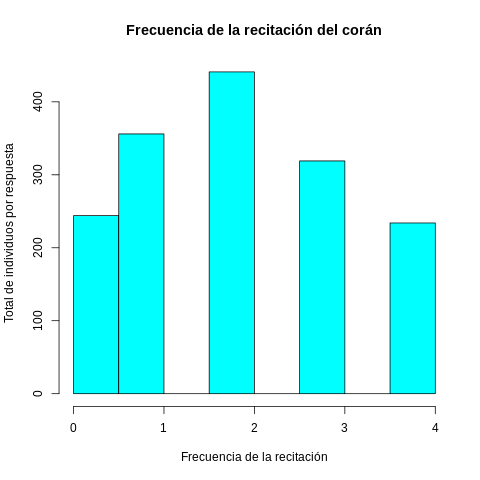

In [ ]:
%%R

hist(RecitingQuran33, main = "Frecuencia de la recitación del corán", xlab = "Frecuencia de la recitación", ylab = "Total de individuos por respuesta", col = " Cyan")

##Observaciones

Llama la atención que tanto el caso en el que no se recite en ningún momento y el caso de que solo se recita durante el Ramadán son las respuestas de menor porcentaje, eso nos dice mucho sobre el espíritu religioso de los ciudadanos, sobre su compromiso con sus creencias.

##Histograma de las reuniones religiosas

El criterio de respuesta es el siguiente

* 1 - Más de una vez por semana
* 2 - Solamente los viernes
* 3 - Al menos una vez por semana
* 4 - Más de una vez al mes
* 5 - Nunca



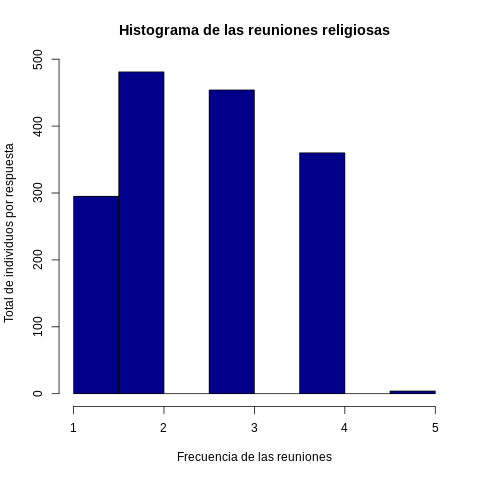

In [ ]:
%%R

hist(Attendingreligiousgatherings34, main = "Histograma de las reuniones religiosas", xlab = "Frecuencia de las reuniones", ylab = "Total de individuos por respuesta", col = "DarkBlue")

##Observaciones

Similar que en la observación anterior, el compromiso religioso es notorio, sin embargo llama la atención que la cantidad de individuos que nunca recitanel Corán sea mucho mayor que la cantidad de individuos que nunca asisten a las reuniones religiosas.

Muy seguramente esta situación está ligada al nivel de educación de los ciudadanos, de ahí que vea apropiado que acontinuación estudiemos el caso del nivel de educación y la capacidad de lectura de cada individuo. Para hacerlo, centraremos nuestra atención en ese porcentaje del dataset que representa un verdadero compromiso religioso.

##Gráfico de pastel sobre el nivel de lectura

El criterio de respuesta es el siguiente:

* 0 - No lee
* 1 - Lee pero con dificultad
* 2 - Lee con facilidad

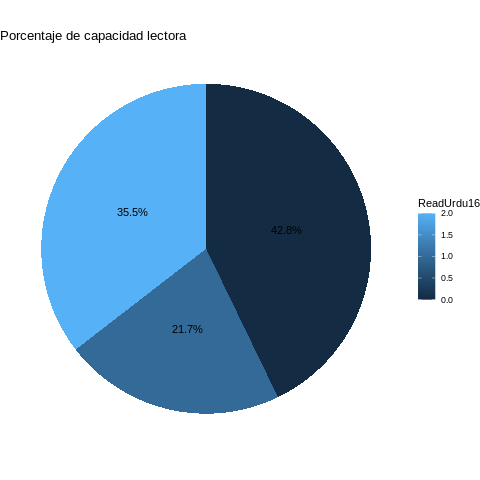

In [ ]:
%%R

library(tidyverse)


porcentaje_categoria <- data[Attendingreligiousgatherings34 != 5, ] %>%
  group_by(ReadUrdu16) %>%
  count( ) %>%
  ungroup( ) %>%
  mutate(Porcentaje = n/sum(n)*100)


ggplot(porcentaje_categoria,
       aes(x = 1, y = Porcentaje, fill = ReadUrdu16)) +
       geom_bar(stat = "identity") +
       geom_text(aes(label = paste0(round(Porcentaje, 1), "%")),
                 position = position_stack(vjust = 0.5)) +
       coord_polar(theta = "y") +
       theme_void() +
       labs(title = "Porcentaje de capacidad lectora")

##Observaciones

Es alarmante como el porcentaje mayor está dado por ese sector de la población que no sabe leer, siendo un 42.8%, lo cuál hace sentido pues son parte de la sección de la población que tiene gran compromiso con las reuniones religiosas. Quiero pensar que son estas reuniones una buena alternativa para la recitación del Corán para aquellos que no tienen en sus posibilidades la lectura de su literatura sagrada por temas como el analfabetismo.

##Gráfico de pastel de los niveles de estudios de los ciudadanos comprometidos con las reuniones religiosas

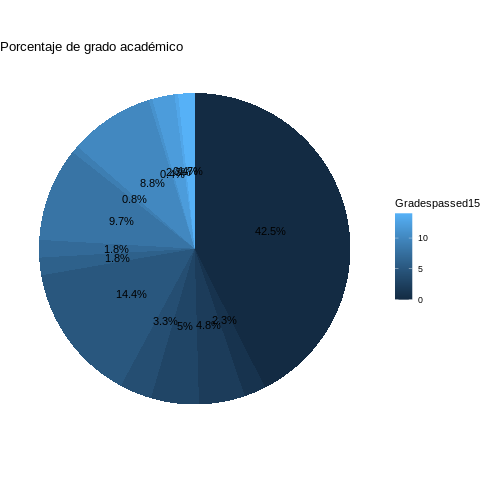

In [ ]:
%%R

porcentaje_categoria <- data[Attendingreligiousgatherings34 != 5, ] %>%
  group_by(Gradespassed15) %>%
  count( ) %>%
  ungroup( ) %>%
  mutate(Porcentaje = n/sum(n)*100)


ggplot(porcentaje_categoria,
       aes(x = 1, y = Porcentaje, fill = Gradespassed15)) +
       geom_bar(stat = "identity") +
       geom_text(aes(label = paste0(round(Porcentaje, 1), "%")),
                 position = position_stack(vjust = 0.5)) +
       coord_polar(theta = "y") +
       theme_void() +
       labs(title = "Porcentaje de grado académico")

##Observaciones

Como era de esperarse, el porcentaje de individuos que carcen de estudios es muy cercano al porcentaje de individuos que no saben leer, una última parada es analizar el fenómeno del Corán para hacer nuestras conclusiones finales.

##Gráfico de pastel de los niveles de estudios de los ciudadanos que no recitan el Corán

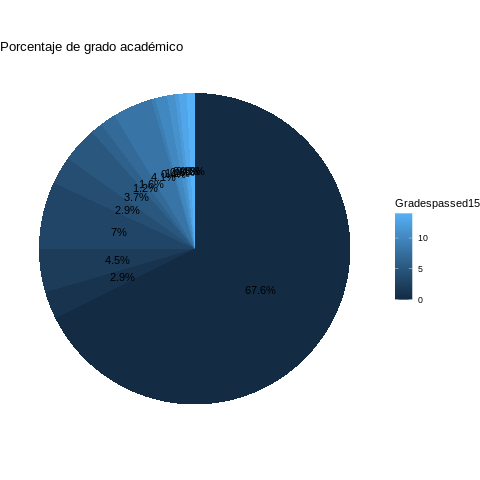

In [ ]:
%%R

porcentaje_categoria <- data[RecitingQuran33 == 0, ] %>%
  group_by(Gradespassed15) %>%
  count( ) %>%
  ungroup( ) %>%
  mutate(Porcentaje = n/sum(n)*100)


ggplot(porcentaje_categoria,
       aes(x = 1, y = Porcentaje, fill = Gradespassed15)) +
       geom_bar(stat = "identity") +
       geom_text(aes(label = paste0(round(Porcentaje, 1), "%")),
                 position = position_stack(vjust = 0.5)) +
       coord_polar(theta = "y") +
       theme_void() +
       labs(title = "Porcentaje de grado académico")

##Observación

Como es de esperarse, son muy pocos los individuos que poseen educación aunque sea un nivel básico, esto explica en gran medida el bajo porcentaje de individuos del islam que pueden leer sin dificultad, pues aparentemente la educación no es una cuestión de fácil acceso.

##Comentarios finales

Acorde a lo planteado con los diferentes gráficos de pastel, todo parece indicar que nuestra especulación es acertada: el compromismo de los individuos con las reuniones religiosas está altalmente ligado con el tema de la educación, pues es una buena alternativa para aquellos que no tienen en sus posibilidades la recitación del Corán debido a que no saben leer o que tienen dificultades, esto en parte porque no tuvieron acceso a la educación básica.

Respondiendo a la pregunta principal, a saber, ¿Existe una relación entre la religiosidad del individuo y el status social?, todo parece indicar que al menos para el caos del Islam, el status social juega un papel importante al momento de pactar cuáles serán las prácicas religiosas del individuo, pues aparentemente se puede tomar dos caminos: la lectura devocional(recitación del Corán) o las reuniones religiosas, depende del status social de si se toma el primer camino o el segundo. Parece ser que la forma de vivir la religión islam depende en gran medida de las circunstancias, nadie vive la religión de la misma forma.